In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ble_data=pd.read_csv('iBeacon_RSSI_Labeled.csv')
ble_data.head()

,location,date,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,O02,10-18-2016 11:15:21,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
1,P01,10-18-2016 11:15:19,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
2,P01,10-18-2016 11:15:17,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
3,P01,10-18-2016 11:15:15,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
4,P01,10-18-2016 11:15:13,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200


# 分类任务目标:根据设备信号强度预测location

In [2]:
ble_data.dropna(axis=0,how="all")

,location,date,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,O02,10-18-2016 11:15:21,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
1,P01,10-18-2016 11:15:19,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
2,P01,10-18-2016 11:15:17,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
3,P01,10-18-2016 11:15:15,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
4,P01,10-18-2016 11:15:13,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
5,P01,10-18-2016 11:15:11,-200,-200,-82,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
6,P01,10-18-2016 11:15:09,-200,-200,-80,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
7,P02,10-18-2016 11:15:07,-200,-200,-86,-200,-200,-200,-200,-200,-200,-200,-200,-200,-200
8,R01,10-18-2016 11:15:05,-200,-200,-200,-75,-200,-200,-200,-200,-200,-200,-200,-200,-200
9,R01,10-18-2016 11:15:03,-200,-200,-200,-75,-200,-200,-200,-200,-200,-200,-200,-200,-200


In [3]:
features=ble_data.drop(['location','date'],axis=1).values
labels=ble_data['location']
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
labels=le.fit_transform(labels)
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3)
print("X_trian shape --> {}".format(X_train.shape))
print("y_train shape --> {}".format(y_train.shape))
print("X_test shape --> {}".format(X_test.shape))
print("y_test shape --> {}".format(y_test.shape))

X_trian shape --> (994, 13)
y_train shape --> (994,)
X_test shape --> (426, 13)
y_test shape --> (426,)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## 1.SVM

[]

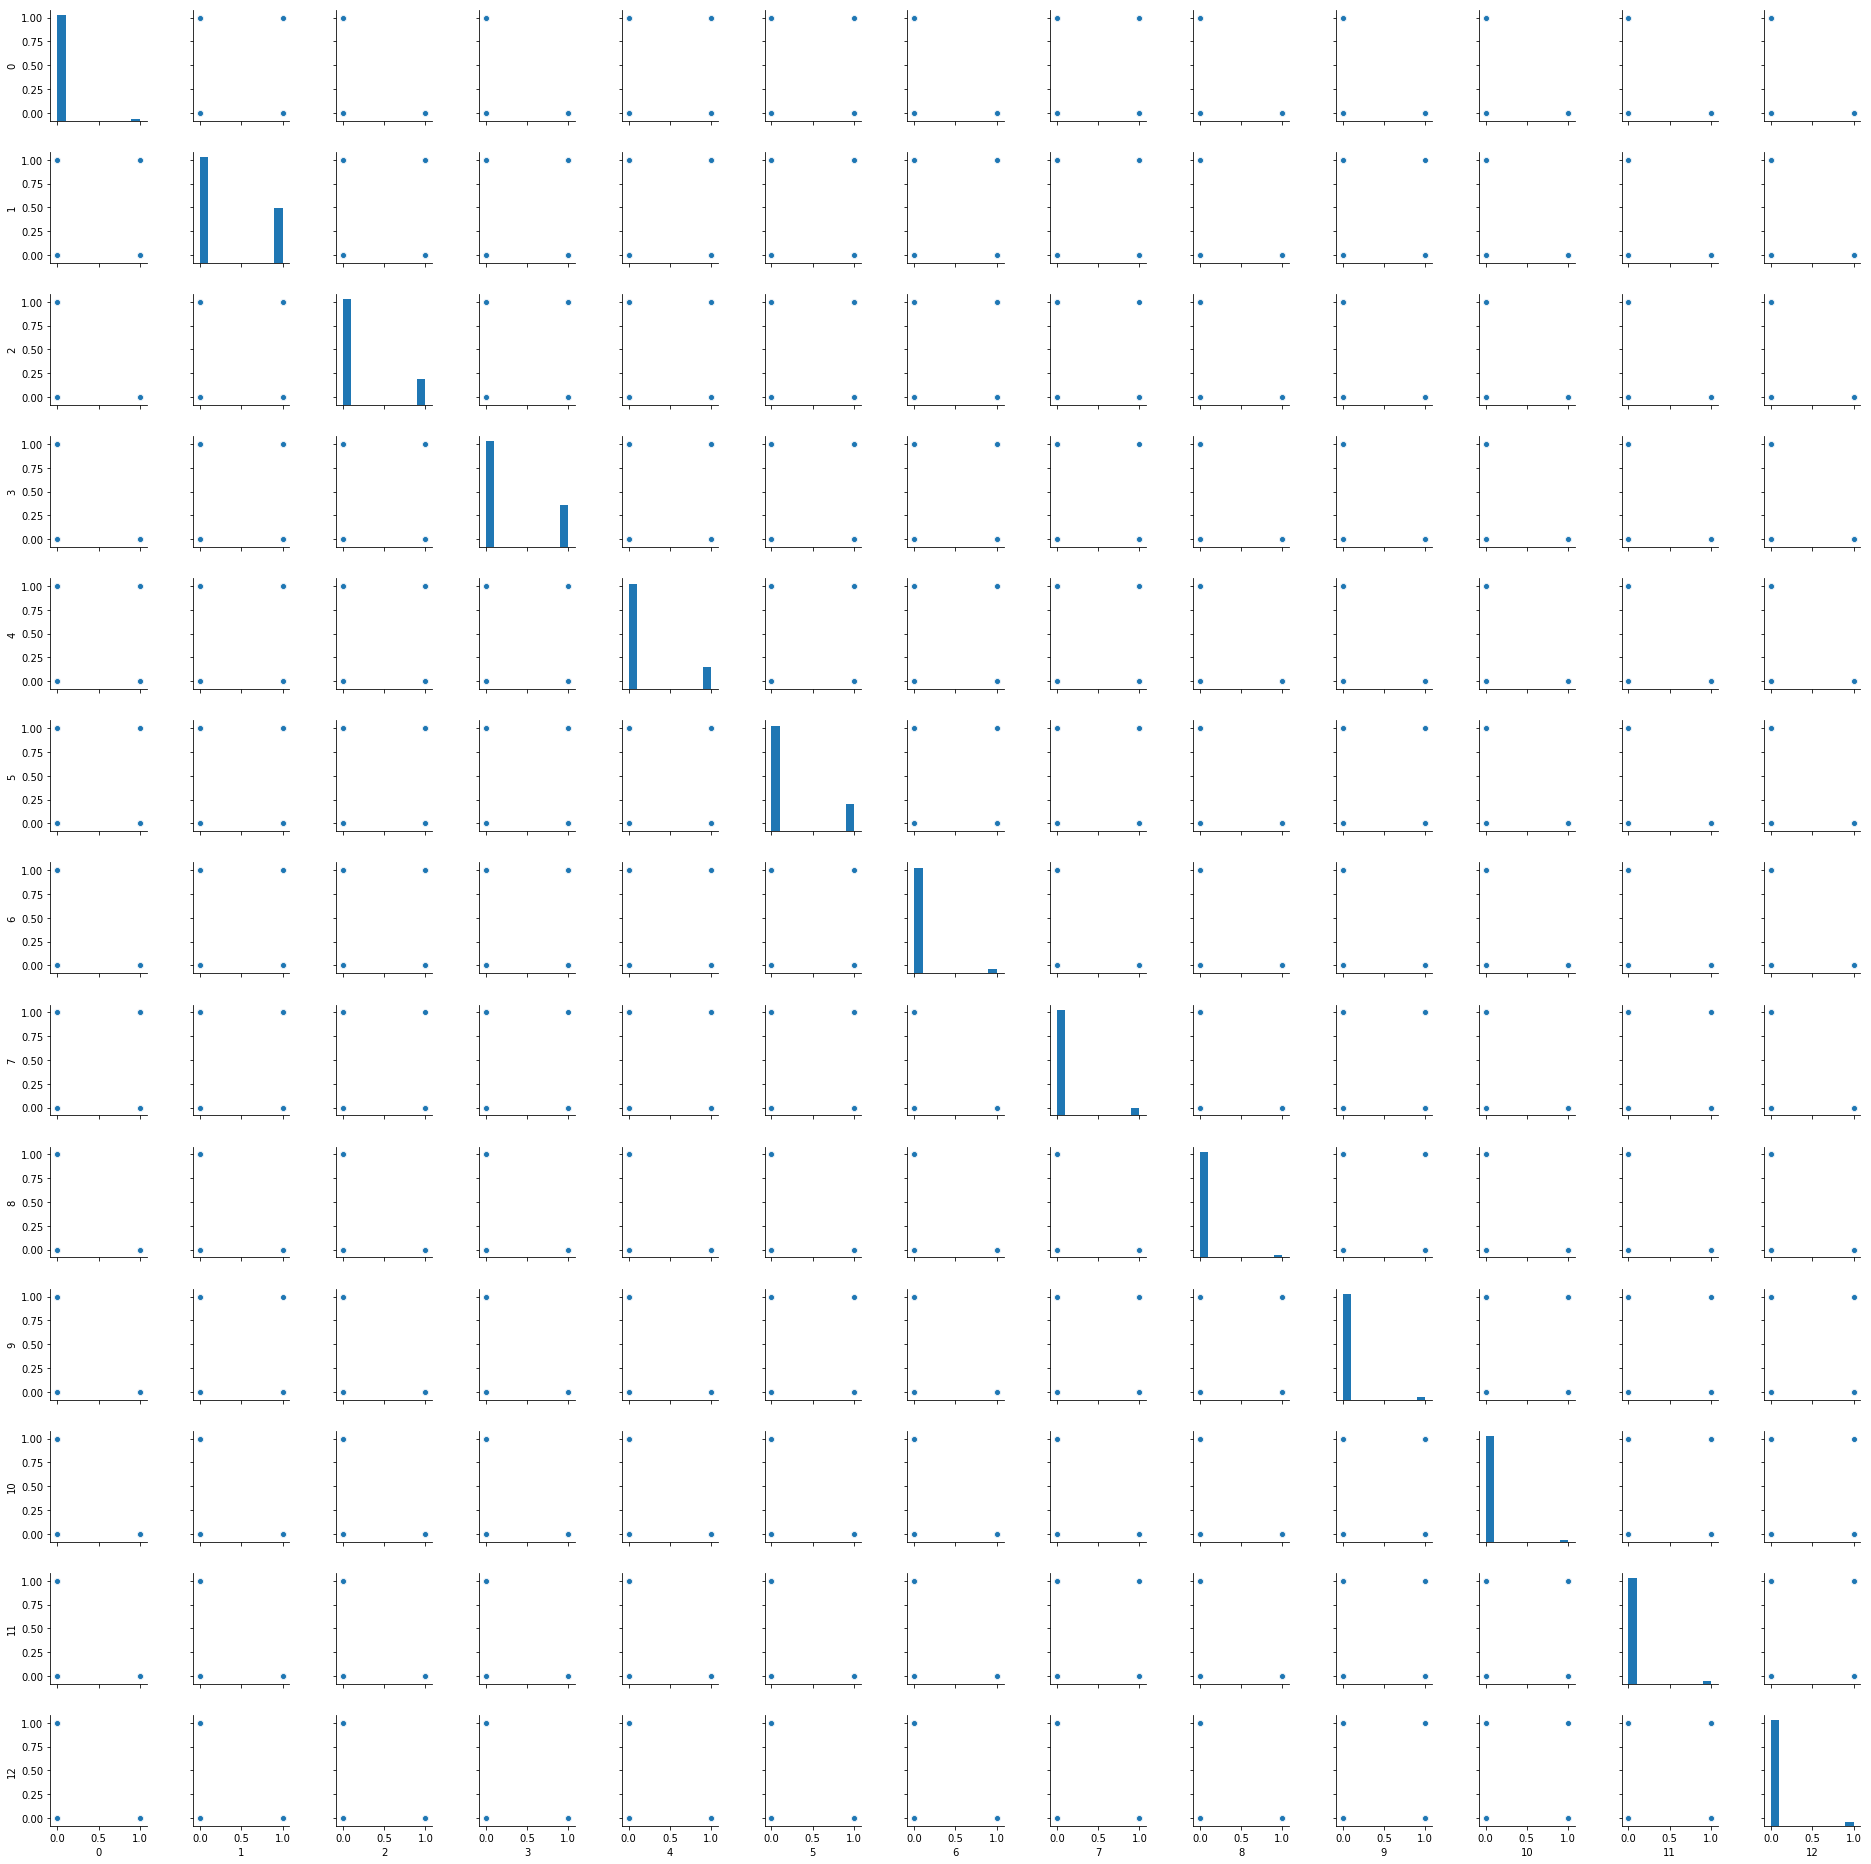

In [4]:
features=np.where(features<=-100,0,1)
cared_data=features
cared_data=pd.DataFrame(cared_data)
sns.pairplot(cared_data,height=2.0)
plt.tight_layout()
plt.plot()

In [5]:
from sklearn import svm
clf = svm.SVC(gamma='scale',decision_function_shape='ovr')
lin_clf = svm.LinearSVC()
lin_clf.fit(X_train,y_train) 
print(lin_clf.score(X_train,y_train))
lin_clf.score(X_test,y_test)

0.0613682092555332


0.03755868544600939

### 无论是否处理成0,1,svm效果都很差

## 2.决策树

In [6]:
from sklearn import tree
from sklearn import metrics
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
prediction=clf.predict(X_test )
print('准确率: ', metrics.accuracy_score(prediction,y_test))

准确率:  0.284037558685446


## 3.随机森林

In [7]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier(oob_score=True, random_state=10)
rf = rf.fit(X_train,y_train)
prediction=rf.predict(X_test )
print('准确率: ', metrics.accuracy_score(prediction,y_test))

准确率:  0.2793427230046948


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


# 聚类任务

In [8]:
ble_data=pd.read_csv('iBeacon_RSSI_Unlabeled.csv')
ble_data.head()

,location,date,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,?,11-7-2016 12:29:01,-200,-200,-80,-200,-77,-56,-81,-200,-200,-200,-200,-200,-200
1,?,11-7-2016 12:29:00,-200,-200,-80,-200,-78,-56,-200,-200,-200,-200,-200,-200,-200
2,?,11-7-2016 12:28:59,-200,-200,-81,-200,-74,-63,-200,-200,-200,-200,-200,-200,-200
3,?,11-7-2016 12:28:58,-200,-200,-200,-200,-75,-56,-200,-200,-200,-200,-200,-200,-200
4,?,11-7-2016 12:28:57,-200,-200,-200,-200,-82,-56,-200,-200,-200,-200,-200,-200,-200


In [9]:
features=ble_data.drop(['location','date'],axis=1).values
# features=np.where(features<=-100,0,1)
features=np.where(features<=-120,-120,features)

## 1.Kmeans

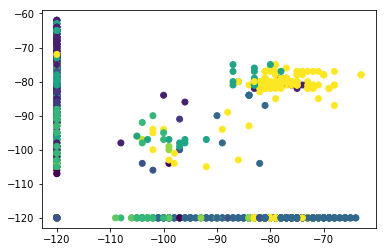

In [10]:
from sklearn.cluster import KMeans
# from sklearn import datasets
from sklearn.manifold import TSNE
tsne=TSNE()
tsne.fit_transform(features)

y = KMeans(n_clusters=13, random_state=9).fit_predict(features)
plt.scatter(features[:, 0], features[:, 1], c=y)
plt.show()

## 2.DBSCAN


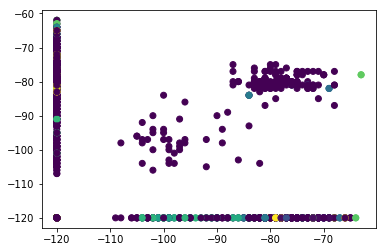

In [11]:
from sklearn.cluster import DBSCAN
y_pred = DBSCAN(eps=0.1,min_samples = 2).fit_predict(features)
plt.scatter(features[:, 0], features[:, 1], c=y_pred)
plt.show()

## GMM


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Fun

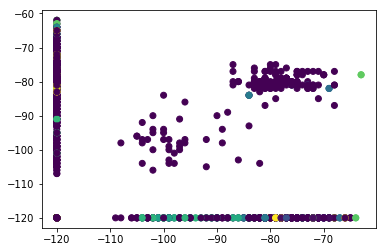

In [12]:
from sklearn.mixture import GMM
gmm=GMM(n_components=13)
y=gmm.fit_predict(features)
plt.scatter(features[:, 0], features[:, 1], c=y_pred)
plt.show()